# Dashboards

### Working with Plotly
Plotly is an open-source graphing library that allows you to create interactive, publication-quality graphs online. It supports over 40 unique chart types, including statistical, financial, scientific, and 3D charts. **IT IS IMPORTANT TO NOTE THAT VISUALS FROM PLOTLY AS NOT SAVED IN STATIC FORMATS BUT INSTEAD USED FOR INTERACTIVE PURPOSES SUCH AS DASHBOARDS FROM LIVE INTERACTIONS!!**

Key features include:
* Interactivity: Charts are interactive, allowing users to zoom, pan, hover for details, and toggle traces.
* Web-based: It's designed for web applications and dashboards, producing HTML-based outputs.
* Multi-language support: While widely used in Python, it also has APIs for R, MATLAB, and JavaScript.
* Versatility: It's suitable for a wide range of applications, from data exploration in notebooks to creating complex analytical dashboards.

#### Plotly Libraries
**plotly.graph_objects**: This is a low level interface to figures, traces and layout. The Plotly graph objects module provides an automatically generated hierarchy of classes ( figures, traces, and layout) called graph objects. These graph objects represent figures with a top-level class plotly.graph_objects.Figure.
  
**plotly.express**: Plotly express is a high-level wrapper for Plotly. It is a recommended starting point for creating the most common figures provided by Plotly using a simpler syntax. It uses graph objects internally. Now let us use these libraries to plot some charts We will start with plotly_graph_objects to plot line and scatter plots

In [4]:
# Let's work with the airline data from San Fransico Airport for our purpose
import pandas as pd
File = pd.read_csv("airline_data.csv")
airline_data = pd.DataFrame(File)
airline_data.drop(columns = "Unnamed: 0.1", axis = 1, inplace = True)
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airline_data.shape
#Since we have about whooping 27,000 records. Lets only use 500 random records to reduce our computational cost

(27000, 110)

In [8]:
#gathering the sample 500 data
airline_sample = airline_data.sample(n = 500, random_state = 0)
airline_sample.shape

(500, 110)

In [10]:
airline_sample.info() #a shorter version of the data summary is provided due to significant number of columns 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 9482 to 9716
Columns: 110 entries, Unnamed: 0 to Div5TailNum
dtypes: float64(74), int64(19), object(17)
memory usage: 433.6+ KB


In [12]:
#we have whooping 110 columns, so lets have a peek of our features
airline_sample.info(verbose = True) #we use verbose to render all the list of columns that more than 100 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 9482 to 9716
Data columns (total 110 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    Unnamed: 0                       int64  
 1    Year                             int64  
 2    Quarter                          int64  
 3    Month                            int64  
 4    DayofMonth                       int64  
 5    DayOfWeek                        int64  
 6    FlightDate                       object 
 7    Reporting_Airline                object 
 8    DOT_ID_Reporting_Airline         int64  
 9    IATA_CODE_Reporting_Airline      object 
 10   Tail_Number                      object 
 11   Flight_Number_Reporting_Airline  int64  
 12   OriginAirportID                  int64  
 13   OriginAirportSeqID               int64  
 14   OriginCityMarketID               int64  
 15   Origin                           object 
 16   OriginCityName                   object 
 1

#### Lineplots

In [15]:
airline_sample["Month"].value_counts()

Month
4     47
10    44
1     44
7     43
3     43
12    43
11    43
5     42
6     39
2     39
8     39
9     34
Name: count, dtype: int64

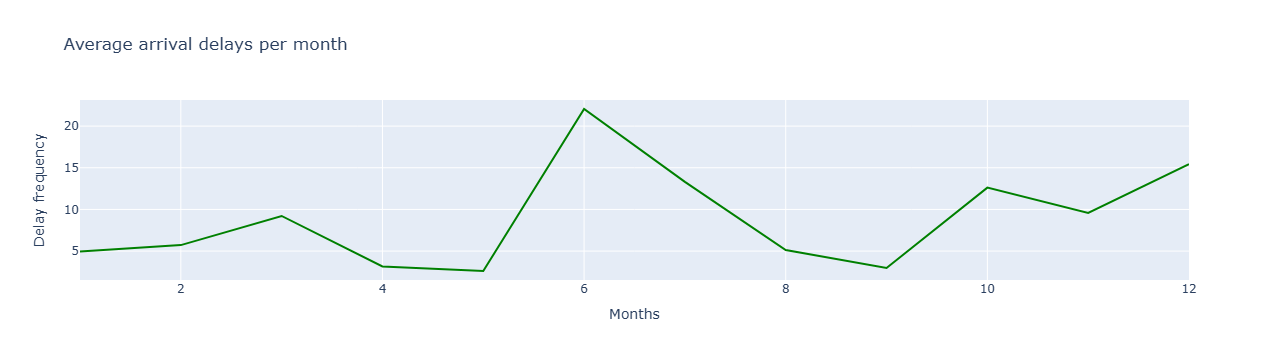

In [17]:
# So now let's calculate average flight arrival delay over the month. There are lot of avg. arr. flight delays over a particular month, and therefore they need to be grouped by
import plotly.graph_objects as go #for this purpose we shall deploy plotly.graph_objects

Avg_flight_delay = airline_sample.groupby("Month")["ArrDelay"].mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x = Avg_flight_delay.index, y = Avg_flight_delay.values, mode = "lines", marker = dict(color = "green")))
#its better to use the index and values of the grouped series for such plotting because of their proper sorting out
fig.update_layout(title = "Average arrival delays per month", xaxis_title = "Months", yaxis_title = "Delay frequency")
fig.show()

In [19]:
Avg_flight_delay

Month
1      4.954545
2      5.717949
3      9.214286
4      3.148936
5      2.609756
6     22.052632
7     13.309524
8      5.128205
9      2.970588
10    12.613636
11     9.581395
12    15.428571
Name: ArrDelay, dtype: float64

#### Scatterplot

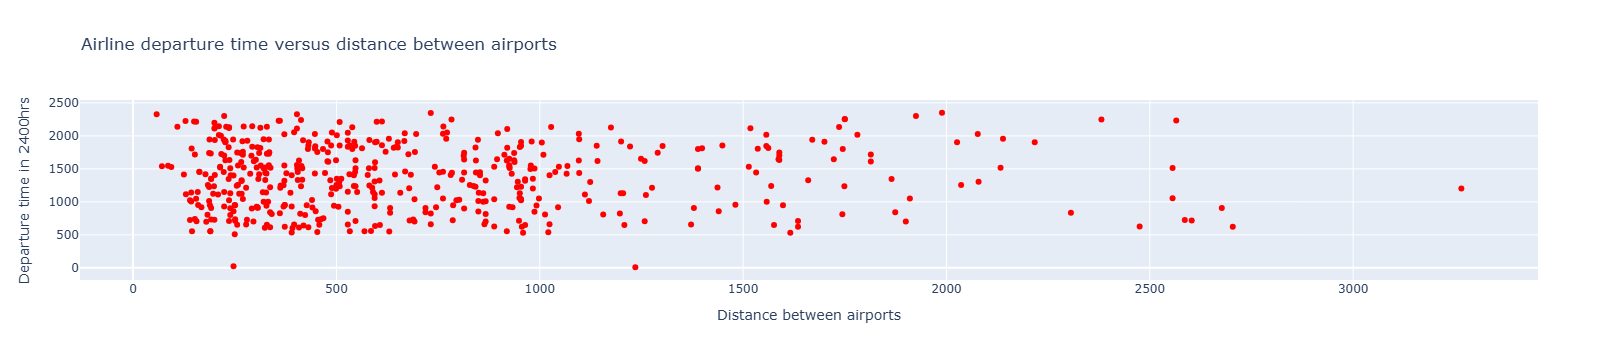

In [22]:
import plotly.graph_objects as go #we shall use this interface compared to express interface for our purpose here

fig = go.Figure()
fig #first we create an empty figure using the go function

# Let's develop a scatterplot that records distance versus departure time of airplanes
fig.add_trace(go.Scatter(x = airline_sample["Distance"], y = airline_sample["DepTime"], mode = "markers", marker = dict(color = "red"))) # mode determines the kind of plot
                                                                                                                    # we are preparing. markers denote scatters
fig.update_layout(title = "Airline departure time versus distance between airports", xaxis_title = "Distance between airports", yaxis_title = "Departure time in 2400hrs")
fig.show()
#remember to check the interactivity of the plot

#### Bar chart

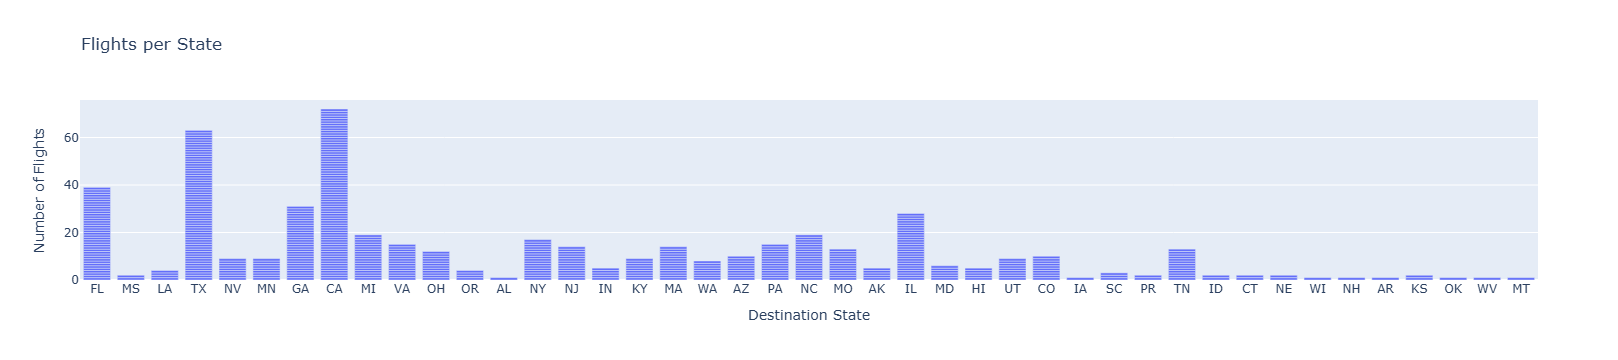

In [25]:
#Lets check the number of flights to a particular destination state
import plotly.express as px #we shall use plotly.express for our purpose. There seem to be no need to develop a seperate canvas here
fig = px.bar(x = airline_sample["DestState"], y = airline_sample["Flights"], title = "Flights per State", labels = dict(x = "Destination State", y = "Number of Flights"))
#see how the express can label the data without needing fig.update_layout
fig.show()
#it is interesting how plotly creates a long graph, it looks high-end. 

#### Histogram

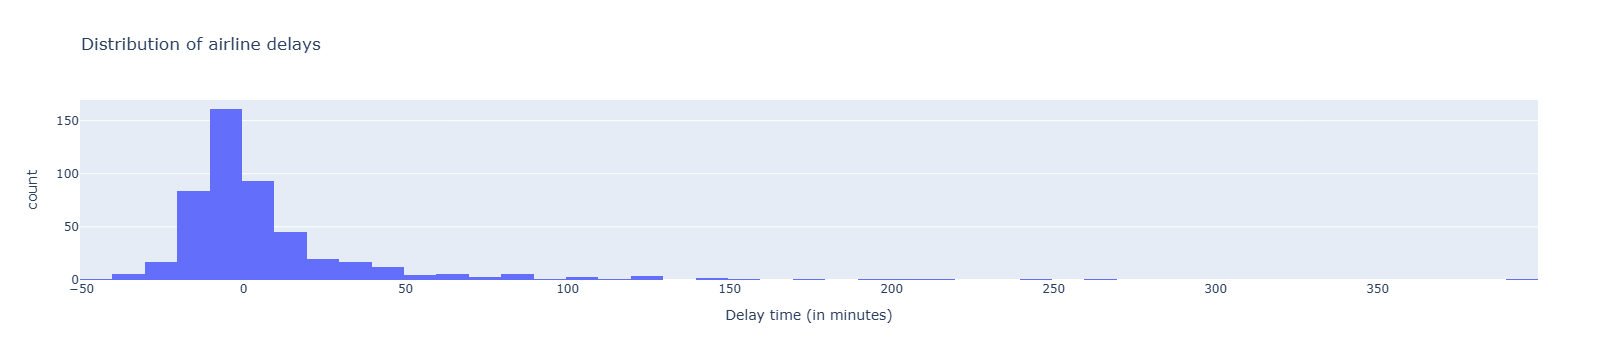

In [27]:
# Let's check the distribution of the arrival delay of airplanes
import plotly.express as px 
fig = px.histogram(x = airline_sample["ArrDelay"], title = "Distribution of airline delays", labels = dict(x = "Delay time (in minutes)", y = "frequency of time"))
fig.show()

### Bubble Chart

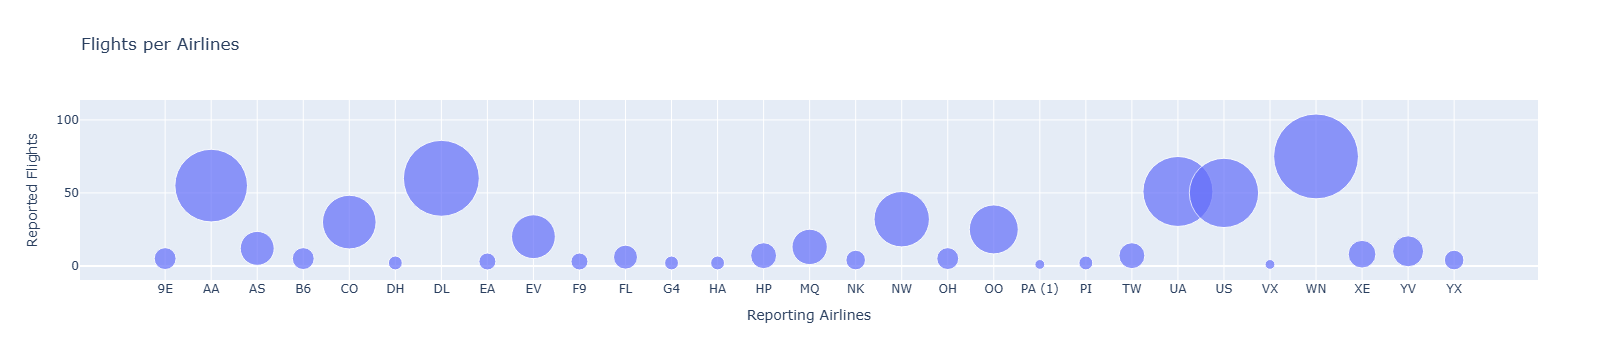

In [30]:
reported_flights = airline_sample.groupby("Reporting_Airline")["Flights"].sum()
import plotly.express as px
fig = px.scatter(x = reported_flights.index, 
                 y = reported_flights.values,
                 size = reported_flights.values,
                 hover_name = reported_flights.index,
                 title = "Flights per Airlines", 
                 labels = dict(x = "Reporting Airlines", y = "Reported Flights"),
                 size_max = 60)
fig.show()

#### Pie Chart

In [34]:
airline_sample["DistanceGroup"].unique()

array([ 5,  2,  4,  1,  3,  7,  6,  8,  9, 11, 10])

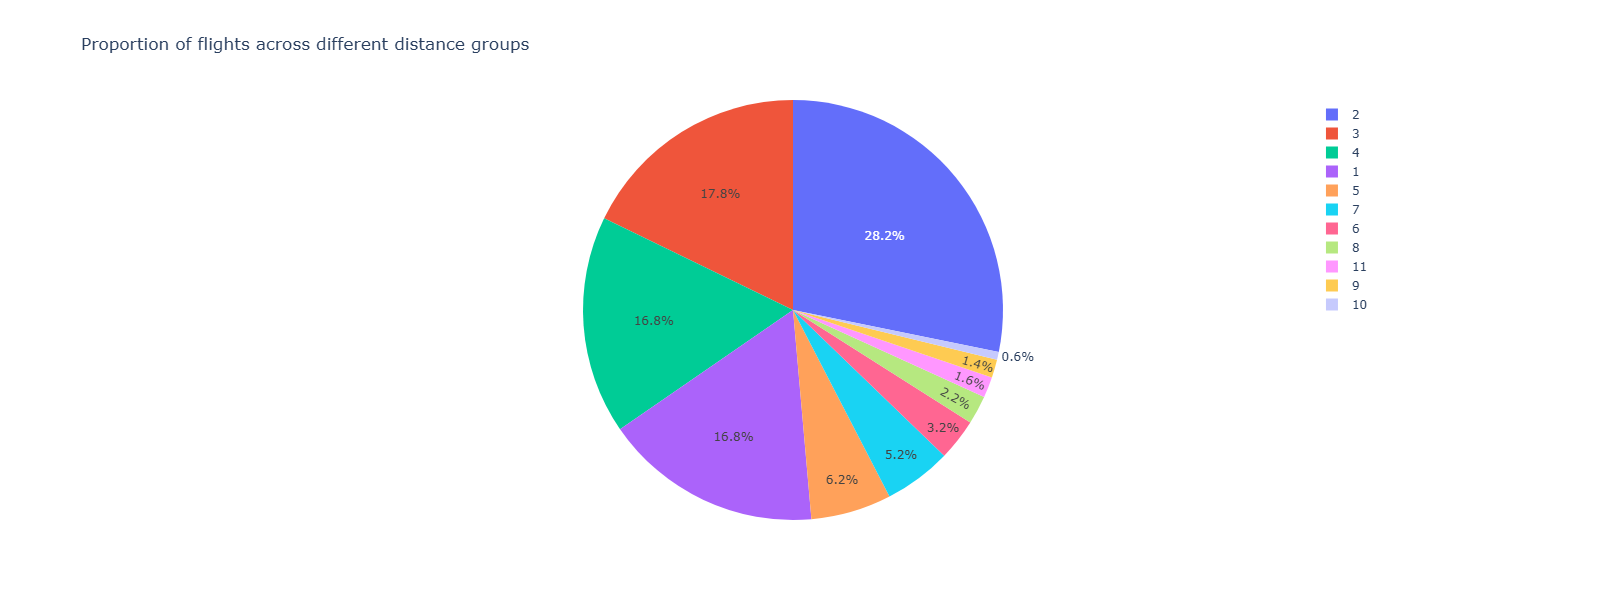

In [36]:
import plotly.express as px
fig = px.pie(values = airline_sample["Flights"], 
             names = airline_sample["DistanceGroup"],
             width = 1000,
             height = 600,
             title = "Proportion of flights across different distance groups")
fig.show()

#### Sunburst Chart

In [39]:
#Through Sunburst we shall depict how many flights were conducted to different destination States from California in given months 
airline_sample["DestStateName"].value_counts()

DestStateName
California        72
Texas             63
Florida           39
Georgia           31
Illinois          28
North Carolina    19
Michigan          19
New York          17
Pennsylvania      15
Virginia          15
Massachusetts     14
New Jersey        14
Missouri          13
Tennessee         13
Ohio              12
Colorado          10
Arizona           10
Nevada             9
Minnesota          9
Kentucky           9
Utah               9
Washington         8
Maryland           6
Hawaii             5
Indiana            5
Alaska             5
Louisiana          4
Oregon             4
South Carolina     3
Mississippi        2
Kansas             2
Idaho              2
Puerto Rico        2
Connecticut        2
Nebraska           2
Alabama            1
Iowa               1
New Hampshire      1
Wisconsin          1
Arkansas           1
Oklahoma           1
West Virginia      1
Montana            1
Name: count, dtype: int64

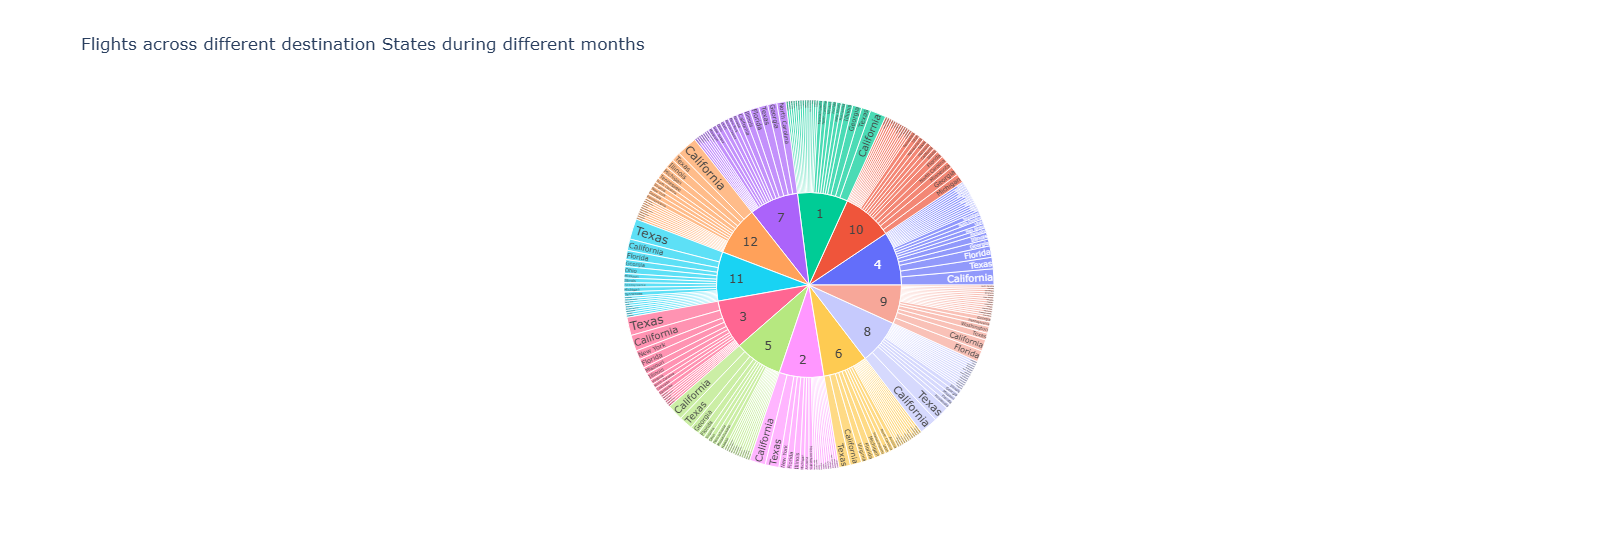

In [41]:
import plotly.express as px
fig = px.sunburst(path = [airline_sample["Month"], airline_sample["DestStateName"]],  
                  values = airline_sample["Flights"], 
                  width = 1000,
                  height = 550,
                  title = "Flights across different destination States during different months")
fig.show()

### Working with Dash

In [1]:
#Now with Dash, we shall create some sort of Dashbord that has a heading, a parapgrah, and a figure representing contribution of different flights to different distance
#group
import pandas as pd
import plotly.express as px
import dash
from dash import dcc #this imports the dash core components as the name suggests
from dash import html #this imports the dash html component

#so we first create the pie chart that we need as our main graph
fig = px.pie(values = airline_sample["Flights"], 
             names = airline_sample["DistanceGroup"],
             width = 1000,
             height = 600,
             title = "Proportion of flights across different distance groups")

#Now creating the dash application
app = dash.Dash(__name__) #this is more like calling lm = LinearRegression()
app.layout = html.Div(children = [html.H1("Airline Dashboard", style = {"textAlign": "center", #this is the assignment fore H1 #html.Div is more like a container to group
                                                                                               #things together
                                                                        "color": "white", 
                                                                        "font_size": 40}),
                                  html.P("We present you with the proportion of flights based on distance group", 
                                         style = {"textAlign": "center",
                                                  "color": "steelblue",
                                                 "font_size":35}),
                                  dcc.Graph(figure = fig)])
app.run()

NameError: name 'airline_sample' is not defined

#### Adding User input and call backs [Step-by-Step Guide]

#### Step I: Designing the layout of the dashboard

In [61]:
#We shall be creating a dashboard that will draw line plots of monthly average airline delay for a given year by providing the input year
import pandas as pd
import plotly.graph_objects as go
import dash 
from dash import dcc, html
from dash.dependencies import Input, Output #This is our concerned package at the moment

app = dash.Dash(__name__)
app.layout = html.Div(children = [html.H1("Airline Average Monthly Flight Delays across the Years",
                                          style = {"textAlign": "center", 
                                                   "color": "Yellow", 
                                                   "font-size": 40}), 
                                  html.Div(["Input Year: ", #this is the placeholder
                                            dcc.Input(id = "input-year",  #this one should determine the design of the input panel
                                                      value = 2010, 
                                                      type = "number", 
                                                      style = {"height": "50px", 
                                                               "font-size": 35, 
                                                              "color": "black"})], #this one determines the color of the year to be written
                                           style = {"font-size": 40, 
                                                   "color": "white"}),  #this determines the color of the panel written "Input Year"
                                   html.Br(), 
                                   html.Br(), #these are like creating two lines of spaces or blanks
                                  html.Div(dcc.Graph(id = "line-plot"))]) #this will create a canvas for the lineplot
app.run()

#### Step II: Feeding Data into the layout through callback function
In Python, @app.callback is a decorator used in the Dash framework to specify that a function should be called when an input component changes its value.The Input and Output functions are used to define the inputs and outputs of a callback function

### <font color = "red"> Warning!!! </font>
It is suggested that the code to run add input placeholders and canvas should be in the same cell as callback codes for full performance of the dashboard

In [63]:
#Now let's develop a callback that shall generate different line charts based on various input years provided
@app.callback(Output(component_id = "line-plot", component_property = "figure"), #this is called the callback decorator and it has to be prepended with "@"
              Input(component_id = "input-year", component_property = "value"))

def get_graph(entered_year):
    df = airline_sample[airline_sample["Year"] == int(entered_year)]
    line_data = df.groupby("Month")["ArrDelay"].mean()
    fig = go.Figure(data = go.Scatter(x = line_data.index, y = line_data.values, mode = "lines", marker = dict(color = "green"))) #it repalces 2-step process of add_trace
    fig.update_layout(title = "Monthly Average Flight Delays", xaxis_title = "Month", yaxis_title = "Arrrival Delays")
    return fig
app.run()

In [65]:
# Let's rather create a complex dashboard with multiple line plots representing multiple sorts of delays
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)
app.layout = html.Div(children = [html.H1("Airline delay reports due to various factors over several years", 
                                         style = {"textAlign": "center",
                                                  "color": "Yellow", 
                                                  "font_size": 40}), 
                                  
                                  html.Div(["Input Year: ", 
                                            dcc.Input(id = "input-year", 
                                                      value = 2010, 
                                                      type = "number", 
                                                      style = {"height": "50px",
                                                               "color": "black", 
                                                               "font_size": 35})], 
                                           style = {"font_size": 40, 
                                                    "color": "white"}),
                                  html.Br(),
                                  html.Br(),
                                  
                                  html.Div([html.Div(dcc.Graph(id = "Arr-Delay")),
                                            html.Div(dcc.Graph(id = "Carrier-Delay")),
                                            html.Div(dcc.Graph(id = "Weather-Delay")), 
                                            html.Div(dcc.Graph(id = "NAS-Delay")), 
                                            html.Div(dcc.Graph(id = "Security-Delay")), 
                                            html.Div(dcc.Graph(id = "Late-Aircraft-Delay"))], 
                                           style = {"display": "flex"})])

@app.callback(Output(component_id = "Arr-Delay", component_property = "figure"),
              Output(component_id = "Carrier-Delay", component_property = "figure"),
              Output(component_id = "Weather-Delay", component_property = "figure"), 
              Output(component_id = "NAS-Delay", component_property = "figure"), 
              Output(component_id = "Security-Delay",component_property = "figure"),
              Output(component_id = "Late-Aircraft-Delay", component_property = "figure"), 
              Input(component_id = "input-year", component_property = "value"))

def get_graph(entered_year):
    df = airline_sample[airline_sample["Year"] == int(entered_year)] #this seems to be mandatory linkage to allow change in graph with change in year
    Arr_delay = df.groupby("Month")["ArrDelay"].mean()
    Carrier_delay = df.groupby("Month")["CarrierDelay"].mean()
    Weather_delay = df.groupby("Month")["WeatherDelay"].mean()
    NAS_delay = df.groupby("Month")["NASDelay"].mean()
    Security_delay = df.groupby("Month")["SecurityDelay"].mean()
    Late_Aircraft_delay = df.groupby("Month")["LateAircraftDelay"].mean()
    
    fig1 = go.Figure(data = go.Scatter(x = Arr_delay.index, y = Arr_delay.values, mode = "lines", marker = dict(color = "green")))
    fig1.update_layout(title = "Monthly Average Airlines Delays", xaxis_title = "Month", yaxis_title = "Arrival Delays")

    fig2 = go.Figure(data = go.Scatter(x = Carrier_delay.index, y = Carrier_delay.values, mode = "lines", marker = dict(color = "green")))
    fig2.update_layout(title = "Monthly Average Carrier Delays", xaxis_title = "Month", yaxis_title = "Carrier Delays")
    
    fig3 = go.Figure(data = go.Scatter(x = Weather_delay.index, y = Weather_delay.values, mode = "lines", marker = dict(color = "green")))
    fig3.update_layout(title = "Monthly Average Weather Delays", xaxis_title = "Month", yaxis_title = "Weather Delays")
    
    fig4 = go.Figure(data = go.Scatter(x = NAS_delay.index, y = NAS_delay.values, mode = "lines", marker = dict(color = "green")))
    fig4.update_layout(title = "Monthly Average NAS Delays", xaxis_title = "Month", yaxis_title = "NAS Delays")
                                                                                                                
    fig5 = go.Figure(data = go.Scatter(x = Security_delay.index, y = Security_delay.values, mode = "lines", marker = dict(color = "green")))
    fig5.update_layout(title = "Monthly Average Security Delays", xaxis_title = "Month", yaxis_title = "Security Delays")
    
    fig6 = go.Figure(data = go.Scatter(x = Late_Aircraft_delay.index, y = Late_Aircraft_delay.values, mode = "lines", marker = dict(color = "green")))
    fig6.update_layout(title = "Monthly Average Late Aircraft Delays", xaxis_title = "Month", yaxis_title = "Late Aircraft Delays")

    return fig1, fig2, fig3, fig4, fig5, fig6
app.run()

In [166]:
#Lets build the orientation of the graph in a differnt manner
import pandas as pd
import plotly.express as px
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)
#Buildng the layout of our dashboard
app.layout = html.Div(children = [html.H1("Airline Delays across the Years", 
                                          style = {"textAlign": "center",
                                                   "color": "yellow",   
                                                   "font_size": 40}), 
                                  html.Div(["Input Year: ", 
                                            dcc.Input(id = "input-years",
                                                      value = 2010, 
                                                      type = "number", 
                                                      style = {"height": "50px", 
                                                               "color": "black",
                                                               "font_size": 35})],
                                           style = {"font_size": 40, 
                                                    "color": "white"}),
                                  html.Br(),
                                  html.Br(), 

                                  html.Div([html.Div(dcc.Graph(id = "Carrier-Delays")),
                                            html.Div(dcc.Graph(id = "Weather-Delays"))],
                                           style = {"display": "flex"}), 

                                  html.Div([html.Div(dcc.Graph(id = "Late-Aircraft-Delays")), 
                                            html.Div(dcc.Graph(id = "Security-Delays"))], 
                                           style = {"display": "flex"}),
                                  
                                  html.Div(html.Div(dcc.Graph(id = "Arrival-Delays")), 
                                           style = {"width": "100%"})]) #ok now zipping most parent div class

#creating the bridge between layout and input data
@app.callback(Output(component_id = "Carrier-Delays", component_property = "figure"), 
              Output(component_id = "Weather-Delays", component_property = "figure"), 
              Output(component_id = "Late-Aircraft-Delays", component_property = "figure"), 
              Output(component_id = "Security-Delays", component_property = "figure"), 
              Output(component_id = "Arrival-Delays", component_property = "figure"), 
              Input(component_id = "input-years", component_property = "value"))

#Now inputting our data in our layout
def get_graph(entered_year):
    df = airline_sample[airline_sample["Year"] == int(entered_year)]
    Carrier_Delays = pd.DataFrame(df.groupby(["Month", "Reporting_Airline"])["CarrierDelay"].mean()).reset_index()
    Weather_Delays = pd.DataFrame(df.groupby(["Month", "Reporting_Airline"])["WeatherDelay"].mean()).reset_index()
    Late_Aircraft_Delays = pd.DataFrame(df.groupby(["Month", "Reporting_Airline"])["LateAircraftDelay"].mean()).reset_index()
    Security_Delays = pd.DataFrame(df.groupby(["Month", "Reporting_Airline"])["SecurityDelay"].mean()).reset_index()
    Arrival_Delays = pd.DataFrame(df.groupby(["Month", "Reporting_Airline"])["ArrDelay"].mean()).reset_index()

    fig1 = px.line(x = Carrier_Delays["Month"], y = Carrier_Delays["CarrierDelay"], color = Carrier_Delays["Reporting_Airline"], title = "Monthly Carrier delays across States") 
    fig2 = px.line(x = Weather_Delays["Month"], y = Weather_Delays["WeatherDelay"], color = Weather_Delays["Reporting_Airline"], title = "Montly Weather delays across States")
    fig3 = px.line(x = Late_Aircraft_Delays["Month"], y = Late_Aircraft_Delays["LateAircraftDelay"], color = Late_Aircraft_Delays["Reporting_Airline"], title = "Montly Late Aircraft delays across States")  
    fig4 = px.line(x = Security_Delays["Month"], y = Security_Delays["SecurityDelay"], color = Security_Delays["Reporting_Airline"], title = "Monthly Security delays across States")  
    fig5 = px.line(x = Arrival_Delays["Month"], y = Arrival_Delays["ArrDelay"], color = Arrival_Delays["Reporting_Airline"], title = "Monthly Arrival delays across States")  
    
    return fig1, fig2, fig3, fig4, fig5
app.run()     